___
# $\color{purple}{\text{KLIENTŲ ASMENYBĖS ANALIZĖ}}$

___

<img src="pristatymui.gif" width="500" align="center">

## $\color{purple}{\text{TIKSLAI}}$
1) Išanalizuoti duomenis ir įvardinti perkamiausias prekes.


2) Susipažinti su klientų amžiumi, išsilavinimu.


3) Sužinoti klientų šeimos statusą ir kiek klientų turi vaikų.


4) Atlikti klientų duomenų klasterizavimą ir suskirstyti į pogrupius tolimesnei analizei.

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

In [2]:
mydb = mysql.connector.connect(
    host='localhost',
    port='3317',
    user='root',
    password= '*'
    
)

cursor = mydb.cursor()
cursor.execute('SHOW DATABASES')
for i in cursor:
    print(i)

('analysis',)
('db',)
('duombazė',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('studentai',)
('sys',)
('world',)


In [3]:
cursor.execute('USE analysis')
df = pd.read_sql('SELECT * FROM marketing_campaign', con=mydb)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# $\color{purple}{\text{DUOMENŲ VALYMAS IR RUOŠIMAS}}$

In [4]:
df = df.rename(columns = {'MntWines':'Total_Wines', 'MntFruits':'Total_Fruits', 'MntMeatProducts':'Total_Meat',
                          'MntFishProducts':'Total_Fish', 'MntSweetProducts':'Total_Sweets', 'MntGoldProds':'Total_Gold'})
df
                  

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Total_Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   Total_Wines          2240 non-null   int64 
 10  Total_Fruits         2240 non-null   int64 
 11  Total_Meat           2240 non-null   int64 
 12  Total_Fish           2240 non-null   int64 
 13  Total_Sweets         2240 non-null   int64 
 14  Total_Gold           2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Total_Wines            0
Total_Fruits           0
Total_Meat             0
Total_Fish             0
Total_Sweets           0
Total_Gold             0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:

df.drop(df.index[df['Income'] == 0], inplace=True) #Kadangi mySQL pakeitė null reikšmes į 0, Jupyteryje jas panaikinau visai.


In [8]:
df.shape

(2216, 29)

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
kintamasis = pd.to_datetime(df['Dt_Customer'])

dates = []
for d in df["Dt_Customer"]:
    d = d.date()
    dates.append(d)  
print("Naujausio kliento įrašas:",max(dates))
print("Seniausio kliento įrašas:",min(dates))



Naujausio kliento įrašas: 2014-12-06
Seniausio kliento įrašas: 2012-01-08


In [10]:
earliest_customer = df['Dt_Customer'].max()
df['Customer_For'] = df['Dt_Customer'].apply(lambda x: (earliest_customer - x).days)


In [11]:
current_year = 2022
df['Age'] = 2022 - df['Year_Birth']

In [12]:
df['Marital_Status'] = df['Marital_Status'].map({"Married": "Together", "Alone": "Single",
                                                     "Absurd": "Single", "Divorced": "Single", "Widow": "Single",
                                                     "Single": "Single", "YOLO": "Single", "Together":"Together"})

In [13]:
df['Children'] = df['Kidhome'] + df['Teenhome']


In [14]:
df['Is_Parent'] = np.where(df.Children> 0, 1, 0)


In [15]:
df['Family_Size'] = df['Marital_Status'].replace({'Single': 1, 'Together':2})+ df['Children']


In [16]:
df['Education']=df['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                                             "Graduation":"Graduate", "Master":"Postgraduate",
                                             "PhD":"Postgraduate"})

In [17]:
df['Money_Spent'] = (df["Total_Wines"] + df["Total_Fruits"] + df["Total_Meat"] + df["Total_Fish"]
                     + df["Total_Sweets"] + df["Total_Gold"])

In [18]:
to_drop = ["Year_Birth", "Z_CostContact", "Z_Revenue", "ID"]
df = df.drop(to_drop, axis=1)

In [19]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Total_Wines,Total_Fruits,Total_Meat,Total_Fish,Total_Sweets,Total_Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Children,Is_Parent,Family_Size,Money_Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,512.006318,53.179603,0.947202,0.714350,2.592509,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,0.749062,0.451825,0.905722,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,1.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,340.000000,45.000000,0.000000,0.000000,2.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,513.000000,52.000000,1.000000,1.000000,3.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,686.000000,63.000000,1.000000,1.000000,3.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1063.000000,129.000000,3.000000,1.000000,5.000000,2525.000000


Kai kurių pasirinktų funkcijų santykinis brėžinys: duomenų poaibis


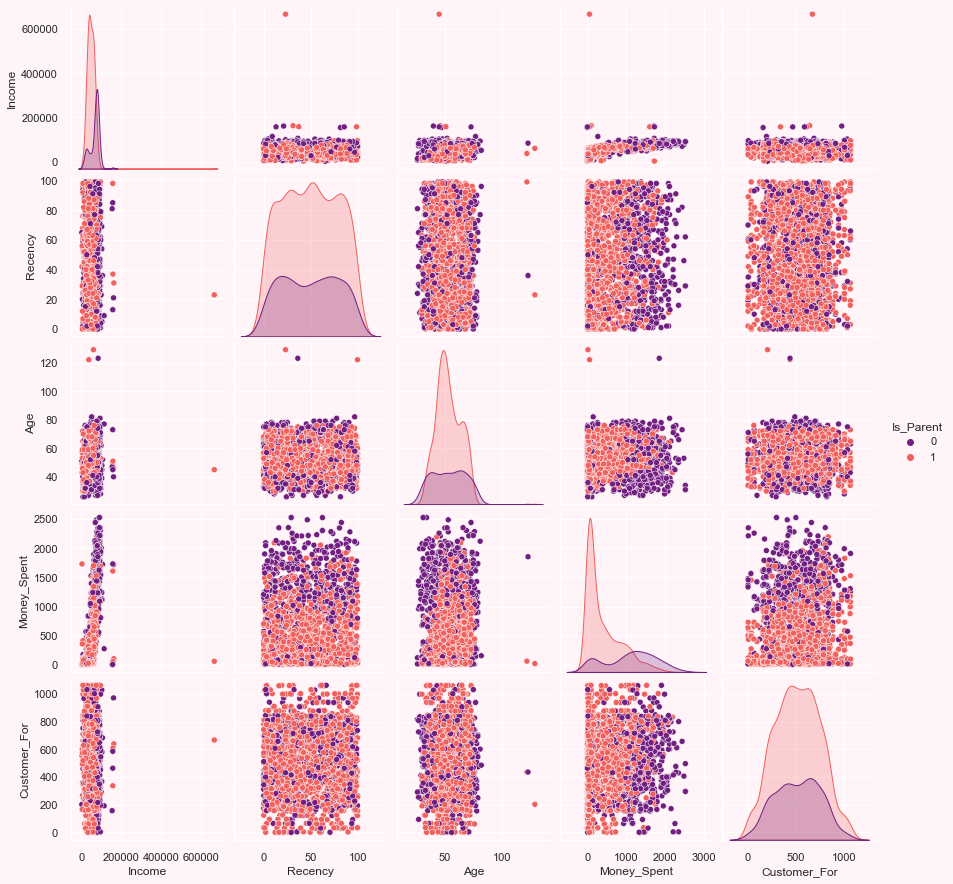

In [20]:
sns.set_theme(rc={"axes.facecolor":"#fff5f9","figure.facecolor":"#fff5f9"})
To_Plot = [ 'Income', 'Recency', 'Age', 'Money_Spent', 'Is_Parent', 'Customer_For' ]
sns.pairplot(df[To_Plot], hue= "Is_Parent", palette= 'magma')

print("Kai kurių pasirinktų funkcijų santykinis brėžinys: duomenų poaibis")

Akivaizdu, kad pajamų ir amžiaus funkcijose yra keletas nuokrypių. Duomenų nukrypimai ištrinami.

In [21]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("Bendras duomenų taškų skaičius pašalinus nuokrypius yra:", len(df))


Bendras duomenų taškų skaičius pašalinus nuokrypius yra: 2212


Linijinių koreliacijų tarp kintamųjų vizualizavimui naudojama Heatmap vizualizaciją.
Koreliacijos ryšys remiasi Pearsono koreliacijos koeficientu (-1, 0, 1).
 Koreliacijos parodo ryšio kryptį vieno kintamojo reikšmei didėjant, kito kintamojo reikšmė mažėja arba didėja.
 + Koreliacija rodo, kad vienam kintamajam didėjant, didėja ir kitas.
 - Koreliacija rodo, kad vienam didėjant, kitas mažėja. 
Kuo arčiau -1 ar 1 nuokrypio, tuo priklausomybė stipresnė.

Duomenys sutvarkyti, naujos reikšmės įtrauktos.

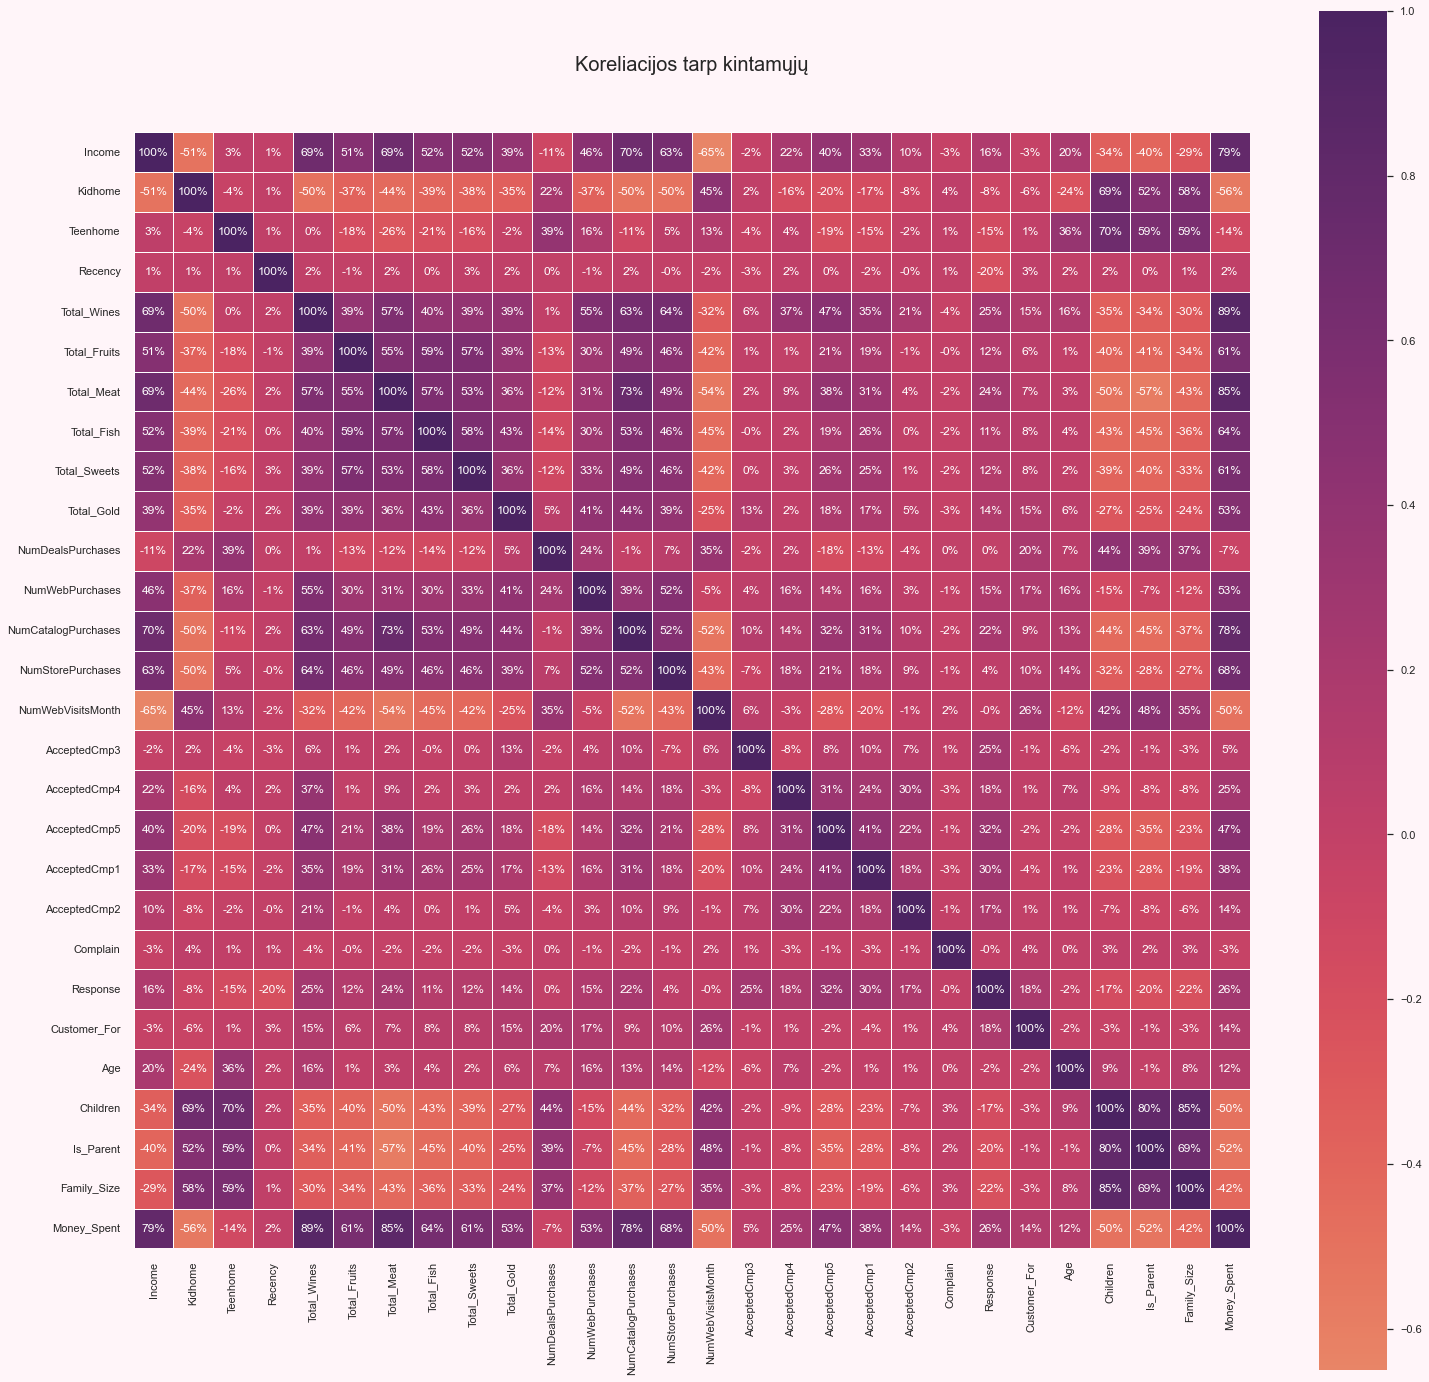

In [22]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center = 0, annot= True, square = True, linewidths=.5, cmap='flare', fmt=".0%")
plt.title('Koreliacijos tarp kintamųjų', fontsize=20, y=1.05)
plt.show()

In [23]:
df.to_csv('C:\\Users\\Paulius\\Desktop\\Vilnius coding school\\Python\\Pristatymas\\Tableau_skirta_medziaga.csv')

# $\color{purple}{\text{KLIENTŲ DUOMENŲ ANALIZĖ SU TABLEAU}}$

<img src="Pirkeju_pasiskirstymas_tarp_amziaus_gr.jpg" width ="700" height ="500">

<img src="Klientų išsilavinimas.jpg" width ="700" height ="500">

<img src="Santykių statusas.jpg" width ="700" height ="500">

<img src="Perkamų produktų suvestinė atsižvelgiant į šeimos statusą.jpg" width ="700" height ="500">

<img src="Tėvystė.jpg" width ="700" height ="500">

In [24]:
df['NumAllPurchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

df['ShareDealsPurchases'] = np.round((df['NumDealsPurchases'] / df['NumAllPurchases']) * 100, decimals=1)

df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']


In [25]:
df.drop(['Kidhome', 'Teenhome'], axis=1)

,Education,Marital_Status,Income,Dt_Customer,Recency,Total_Wines,Total_Fruits,Total_Meat,Total_Fish,Total_Sweets,...,Response,Customer_For,Age,Children,Is_Parent,Family_Size,Money_Spent,NumAllPurchases,ShareDealsPurchases,TotalAcceptedCmp
0,Graduate,Single,58138,2012-04-09,58,635,88,546,172,88,...,1,971,65,0,0,1,1617,22,13.6,1
1,Graduate,Single,46344,2014-08-03,38,11,1,6,2,1,...,0,125,68,2,1,3,27,4,50.0,0
2,Graduate,Together,71613,2013-08-21,26,426,49,127,111,21,...,0,472,57,0,0,2,776,20,5.0,0
3,Graduate,Together,26646,2014-10-02,26,11,4,20,10,3,...,0,65,38,1,1,3,53,6,33.3,0
4,Postgraduate,Together,58293,2014-01-19,94,173,43,118,46,27,...,0,321,41,1,1,3,422,14,35.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Together,61223,2013-06-13,46,709,43,182,42,118,...,0,541,55,1,1,3,1341,16,12.5,0
2236,Postgraduate,Together,64014,2014-10-06,56,406,0,30,0,0,...,0,61,76,3,1,5,444,15,46.7,1
2237,Graduate,Single,56981,2014-01-25,91,908,48,217,32,12,...,0,315,41,0,0,1,1241,18,5.6,1
2238,Postgraduate,Together,69245,2014-01-24,8,428,30,214,80,30,...,0,316,66,1,1,3,843,21,9.5,0


# $\color{purple}{\text{KLASTERIZAVIMAS}}$

In [26]:
!pip install yellowbrick


Klasterizavimas: 

Naudojamas padalyti duomenų taškus į keletą grupių taip, kad tų pačių grupių taškai būtų panašesni vienas į kitą ir nepanašūs į kitų grupių duomenų taškus.


Daugelis mašininio mokymo algoritmų veikia geriau, kai skaitiniai įvesties kintamieji yra suskirstyti į standartinį diapozoną.
Tam panaudojamas StandartScaler.

Standartizacija išskirsto kiekvieną įvesties kintamąjį ir pasiskirstymą priskiria 0 reikšmei, o standartinio nuokrypio 1.

In [27]:
df_clustering = df[['Money_Spent','Customer_For', 'NumAllPurchases', 'Income']].copy()


for n in df_clustering.columns:
      df_clustering[n] = StandardScaler().fit_transform(np.array(df_clustering[[n]]))


'Alkūnės metodas' naudojamas parenkant optimaliausią klasterių skaičių. Šiuo atveju: 4.

Atstumui nusakyti tarp taškų klasteriuose apskaičiuojamas WCSS rodiklis(grupės viduje skaičiuoja kvadratų sumas) 

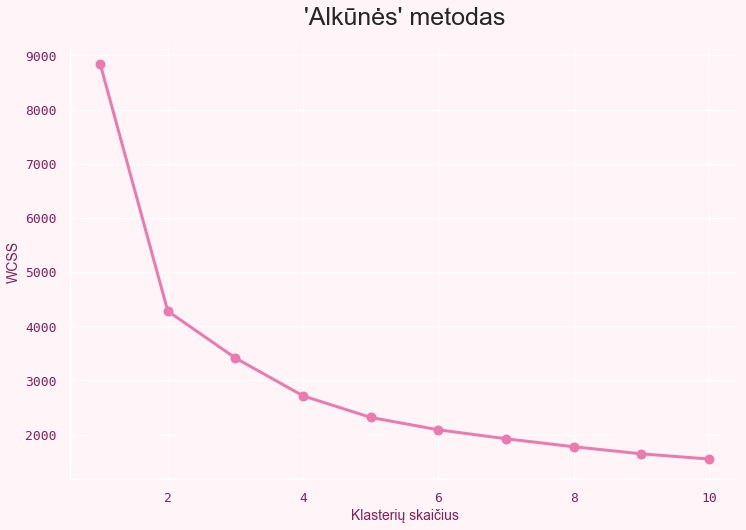

In [28]:
wcss = []
K = range(1,11)
for i in K:
    km = KMeans(n_clusters = i, random_state = 228)
    km.fit(df_clustering)
    wcss.append(km.inertia_)

fig, ax = plt.subplots(figsize =(12, 8))

plt.title("'Alkūnės' metodas", size = 25, y = 1.03)
plt.plot(K, wcss, color = '#eb7aaf', lw=3, marker='o', markerfacecolor='#eb7aaf', markersize=10, markeredgecolor='black')
plt.xlabel('Klasterių skaičius', color = '#822159', size = 14)
plt.ylabel('WCSS', color = '#822159', size = 14)
plt.tick_params(axis='x', colors='#822159')
plt.tick_params(axis='y', colors='#822159')
plt.xticks(size = 13, fontname = 'monospace')
plt.yticks(size = 13, fontname = 'monospace')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



In [29]:
kmeans = KMeans(n_clusters =4 , random_state = 50).fit(df_clustering)
labels = kmeans.predict(df_clustering)
customer_kmeans = df_clustering.copy()
customer_kmeans['clusters'] = labels

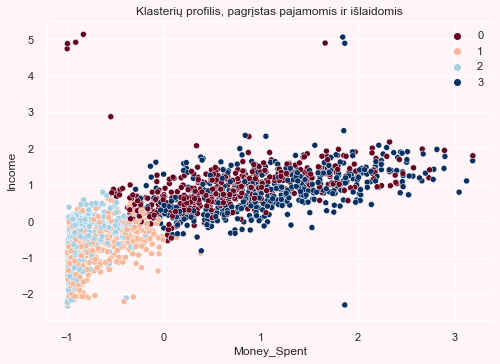

In [32]:
pl = sns.scatterplot(x=customer_kmeans['Money_Spent'], y=customer_kmeans['Income'],
                     hue=customer_kmeans['clusters'], palette= 'RdBu')
pl.set_title("Klasterių profilis, pagrįstas pajamomis ir išlaidomis")
plt.legend()


0 grupė: didelės išlaidos ir didelės pajamos 


1 grupė: žemos išlaidos ir žemos pajamos 


2 grupė: žemos išlaidos ir vidutinės pajamos 


3 grupė: didelės išlaidos ir vidutinės pajamos 

# $\color{purple}{\text{IŠVADOS}}$

1) Išanalizuoti duomenis ir įvardinti perkamiausias prekes: perkamiausi vyno ir mėsos produktai.

2) Susipažinti su klientų amžiumi, išsilavinimu: dominuoja 40-50 amžiaus grupės pirkėjai; 50proc. klientų turi aukštąjį išsilavinimą, 38 proc. klientų turi magistro ar daktaro laipsnį, 11 proc. turi vidurinį išsilavinimą.


3) Sužinoti klientų šeimos statusą ir kiek klientų turi vaikų: didesnė dalis klientų gyvena poroje. Dvigubai daugiau klientų yra esantys tėvai.


4) Atlikti klientų duomenų klasterizavimą ir suskirstyti į pogrupius tolimesnei analizei: išskirti 4 pogrupiai

In [31]:
import os
os.getcwd()

'C:\\Users\\Paulius'